In [17]:
#L L M D M  P A G 
import re
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.decomposition import PCA


sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""


#sentences =  """I am a student of Bachelor of engineering Information Technology.  
               #I love participating in hackathons. Recently, I won GOOGLE WOW HACKATHON.
              #I work at Noveracin Global as a software intern"""


sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

sentences = re.sub(r'(?:^| )\w(?:$| )', ' ',sentences).strip()

sentences = sentences.lower()

words = sentences.split()
vocab = set(words)

vocab


# Define CBOW model
vocab_size = len(vocab)
embedding_size = 10
window_size = 2

In [18]:
word_to_ix = {word : i  for i, word in enumerate(vocab)}

ix_to_word = {i:word for i, word in enumerate(vocab)}

ix_to_word

{0: 'beings',
 1: 'inhabit',
 2: 'evolve',
 3: 'abstract',
 4: 'process',
 5: 'things',
 6: 'by',
 7: 'they',
 8: 'spirits',
 9: 'study',
 10: 'we',
 11: 'other',
 12: 'program',
 13: 'processes',
 14: 'direct',
 15: 'rules',
 16: 'to',
 17: 'spells',
 18: 'create',
 19: 'called',
 20: 'people',
 21: 'are',
 22: 'programs',
 23: 'with',
 24: 'as',
 25: 'directed',
 26: 'is',
 27: 'in',
 28: 'conjure',
 29: 'our',
 30: 'idea',
 31: 'computers',
 32: 'the',
 33: 'of',
 34: 'effect',
 35: 'data',
 36: 'computer',
 37: 'pattern',
 38: 'computational',
 39: 'manipulate',
 40: 'that',
 41: 'evolution',
 42: 'about'}

In [19]:
data = []
for i in range(2,len(words)-2):
    context = [words[i-2],words[i-1],words[i+1],words[i+2]]
    target = words[i]
    data.append((context,target))
print(data[:5])                  

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [21]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size),
    keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(units=vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



X = []  # Your input data (context)
Y = []  # Your target data (target word indices)

for context, target in data:
    context_idxs = [word_to_ix[w] for w in context]
    target_idx = word_to_ix[target]
    X.append(context_idxs)
    Y.append(target_idx)

X = np.array(X)
Y = np.array(Y)

print(X)
print(Y)

model.fit(X, Y, epochs=200, verbose=1)


embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

[[10 21 16  9]
 [21 42  9 32]
 [42 16 32 30]
 [16  9 30 33]
 [ 9 32 33 38]
 [32 30 38  4]
 [30 33  4 38]
 [33 38 38 13]
 [38  4 13 21]
 [ 4 38 21  3]
 [38 13  3  0]
 [13 21  0 40]
 [21  3 40  1]
 [ 3  0  1 31]
 [ 0 40 31 24]
 [40  1 24  7]
 [ 1 31  7  2]
 [31 24  2 13]
 [24  7 13 39]
 [ 7  2 39 11]
 [ 2 13 11  3]
 [13 39  3  5]
 [39 11  5 19]
 [11  3 19 35]
 [ 3  5 35 32]
 [ 5 19 32 41]
 [19 35 41 33]
 [35 32 33  4]
 [32 41  4 26]
 [41 33 26 25]
 [33  4 25  6]
 [ 4 26  6 37]
 [26 25 37 33]
 [25  6 33 15]
 [ 6 37 15 19]
 [37 33 19 12]
 [33 15 12 20]
 [15 19 20 18]
 [19 12 18 22]
 [12 20 22 16]
 [20 18 16 14]
 [18 22 14 13]
 [22 16 13 27]
 [16 14 27 34]
 [14 13 34 10]
 [13 27 10 28]
 [27 34 28 32]
 [34 10 32  8]
 [10 28  8 33]
 [28 32 33 32]
 [32  8 32 36]
 [ 8 33 36 23]
 [33 32 23 29]
 [32 36 29 17]]
[42 16  9 32 30 33 38  4 38 13 21  3  0 40  1 31 24  7  2 13 39 11  3  5
 19 35 32 41 33  4 26 25  6 37 33 15 19 12 20 18 22 16 14 13 27 34 10 28
 32  8 33 32 36 23]
Epoch 1/200
2/2 - 1s - 

Epoch 92/200
2/2 - 0s - loss: 0.0624 - accuracy: 1.0000 - 15ms/epoch - 8ms/step
Epoch 93/200
2/2 - 0s - loss: 0.0595 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 94/200
2/2 - 0s - loss: 0.0566 - accuracy: 1.0000 - 0s/epoch - 0s/step
Epoch 95/200
2/2 - 0s - loss: 0.0542 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 96/200
2/2 - 0s - loss: 0.0519 - accuracy: 1.0000 - 8ms/epoch - 4ms/step
Epoch 97/200
2/2 - 0s - loss: 0.0496 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 98/200
2/2 - 0s - loss: 0.0475 - accuracy: 1.0000 - 13ms/epoch - 6ms/step
Epoch 99/200
2/2 - 0s - loss: 0.0454 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 100/200
2/2 - 0s - loss: 0.0437 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 101/200
2/2 - 0s - loss: 0.0419 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 102/200
2/2 - 0s - loss: 0.0403 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 103/200
2/2 - 0s - loss: 0.0388 - accuracy: 1.0000 - 14ms/epoch - 7ms/step
Epoch 104/200
2/2 - 0s - loss: 0.0374 - ac

Epoch 194/200
2/2 - 0s - loss: 0.0058 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 195/200
2/2 - 0s - loss: 0.0058 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 196/200
2/2 - 0s - loss: 0.0057 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 197/200
2/2 - 0s - loss: 0.0056 - accuracy: 1.0000 - 10ms/epoch - 5ms/step
Epoch 198/200
2/2 - 0s - loss: 0.0056 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 199/200
2/2 - 0s - loss: 0.0055 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 200/200
2/2 - 0s - loss: 0.0054 - accuracy: 1.0000 - 17ms/epoch - 9ms/step


In [20]:
def predict_word(test_words):
    context_idxs = [word_to_ix[w] for w in test_words]
    x_test = np.array([context_idxs])
    
    test_predictions = model.predict(x_test)
    y_pred = np.argmax(test_predictions[0])
    
    predicted_word = ix_to_word[y_pred]
    return predicted_word


predicted_word = predict_word(['we', 'are', 'to', 'study'])
print(f"Prediction for ['we', 'are', 'to', 'study']': {predicted_word}")


1/1 [==============================] - 0s 16ms/step
Prediction for ['we', 'are', 'to', 'study']': program


In [15]:
def accuracy11():
    c_p =0
    t_p = len(data)
    
    for context, target in data:
        p_w = predict_word(context)
        if p_w == target:
            c_p+=1
    acc = c_p / t_p        
    return acc

In [84]:
print("Accuracy:", accuracy11())

1/1 [==============================] - 0s 22ms/step
Accuracy: 1.0


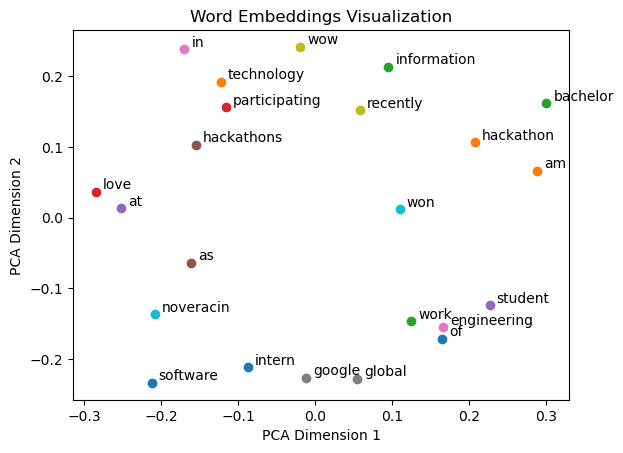

In [16]:
#plt.figure(figsize=(10, 10))
for i, word in enumerate(ix_to_word.values()):  # Assuming ix_to_word is a dictionary mapping indices to words
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points')

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Word Embeddings Visualization')
plt.show()
